<a href="https://colab.research.google.com/github/shabana-sulthana123/Machine-Learning/blob/main/data%20visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
columns = [ "age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income" ]
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header=None,names=columns)
print(df.head())
df = df.dropna()
print(f"Data shape after dropping missing values: {df.shape}")

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)


Numerical features: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical features: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


**1.Bar chart**

  How many individuals belong to each workclass category?

/tmp/ipython-input-3529897608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='workclass', data=df, order=df['workclass'].value_counts().index, palette='coolwarm')


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Self-emp-not-inc'),
  Text(2, 0, 'Local-gov'),
  Text(3, 0, 'State-gov'),
  Text(4, 0, 'Self-emp-inc'),
  Text(5, 0, 'Federal-gov'),
  Text(6, 0, 'Without-pay'),
  Text(7, 0, 'Never-worked')])

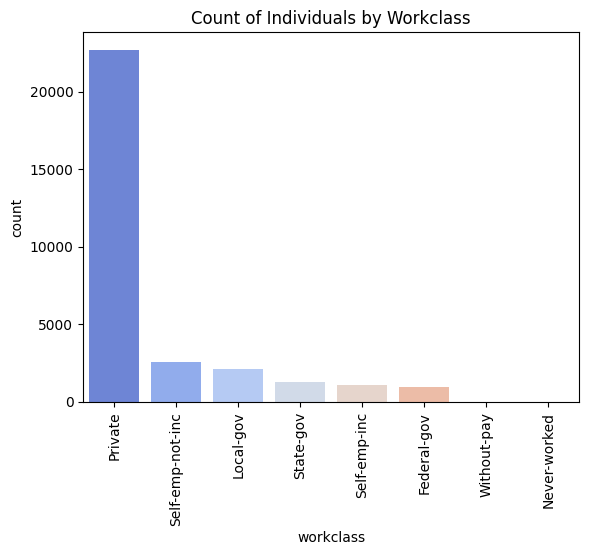

In [ ]:
df = df[df['workclass'] != '?']
sns.countplot(x='workclass', data=df, order=df['workclass'].value_counts().index, palette='coolwarm')
plt.title('Count of Individuals by Workclass')
plt.xticks(rotation=90)
# plt.show()

**2.Pie chart**

  How is the dataset population distributed by race?

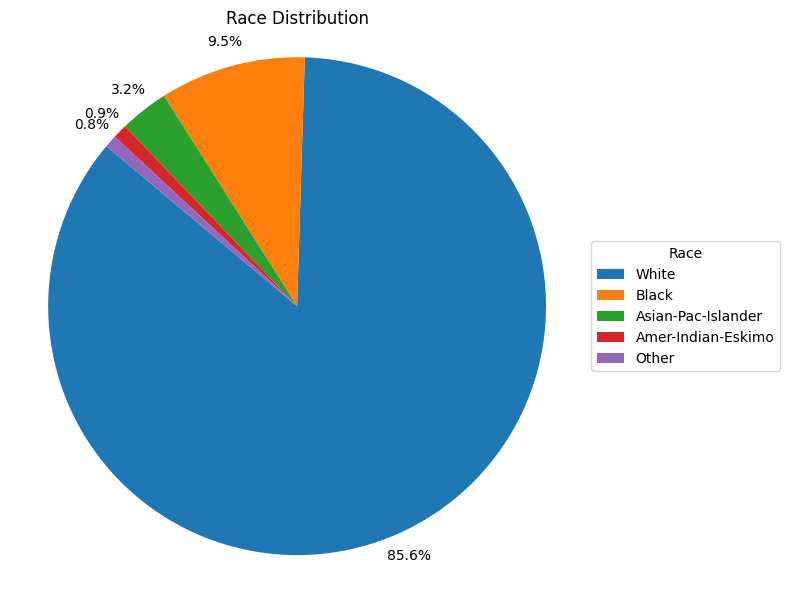

In [ ]:
df['race'] = df['race'].str.strip()
race_counts = df['race'].value_counts()
plt.figure(figsize=(8,6))
patches, texts, autotexts = plt.pie(
    race_counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=1.1 )
plt.legend(
    patches, race_counts.index,
    title="Race",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)
plt.title('Race Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()


3.Histogram

What is the distribution of ages of individuals in the dataset?

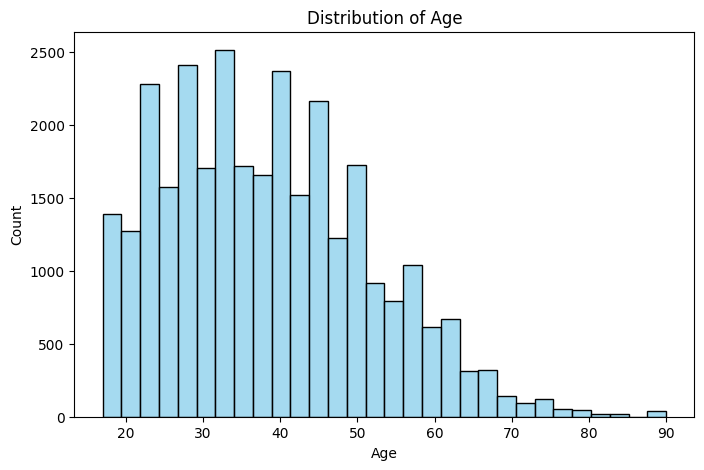

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



4.KDE plot

What is the smoothed distribution of hours worked per week?

/tmp/ipython-input-1251756482.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['hours-per-week'], shade=True, color='orange')


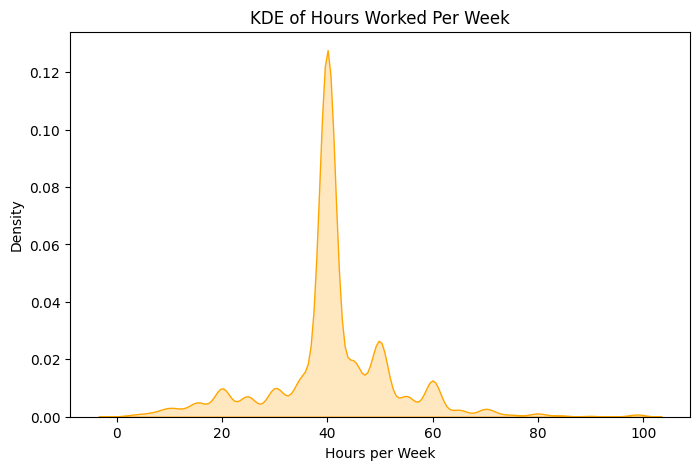

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['hours-per-week'], shade=True, color='orange')
plt.title('KDE of Hours Worked Per Week')
plt.xlabel('Hours per Week')
plt.show()


5.Box plot

What is the spread and presence of outliers in the capital gain values?

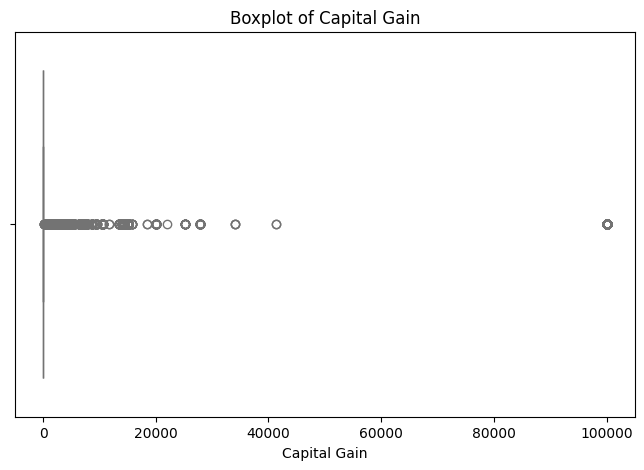

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['capital-gain'], color='lightgreen')
plt.title('Boxplot of Capital Gain')
plt.xlabel('Capital Gain')
plt.show()
